# ARIMA MODEL
- AutoRegressive Integrated Moving Average
- Greate with Clear Trend and Seasonality
- SARIMA
- AR : AutoRegressions
- I : Integrated
- MA : Moving Average

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

## Regression Example

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


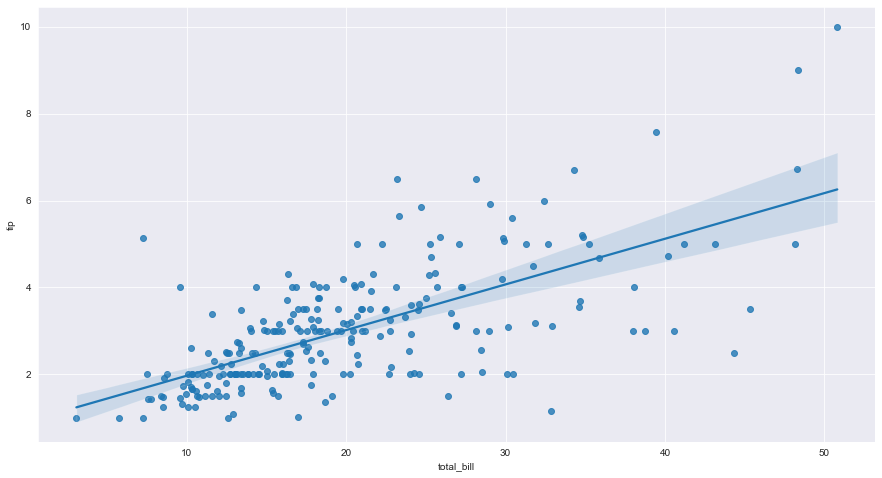

In [3]:
plt.figure(figsize=(15, 8))
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

## Regression Time Series Example with AutoReg

In [4]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

pitt_df = pd.read_csv("./datasets/PittsburghWeather.csv", index_col="Date", parse_dates=True) # Setting Date as Index
pitt_df.drop(["tmin", "prcp"], axis=1, inplace=True) # Dropping Some Columns
pitt_df = pitt_df[pitt_df.index > "2010-01-01"] # Sorting and Getting Data for year 2010 and further
pitt_df = pitt_df.asfreq("d") # Setting the Index/Date Frequency as Day
pitt_df = pitt_df.fillna(method="ffill") # Filling the null Values
pitt_df.isnull().sum() # Checking for Null Values

tmax    0
dtype: int64

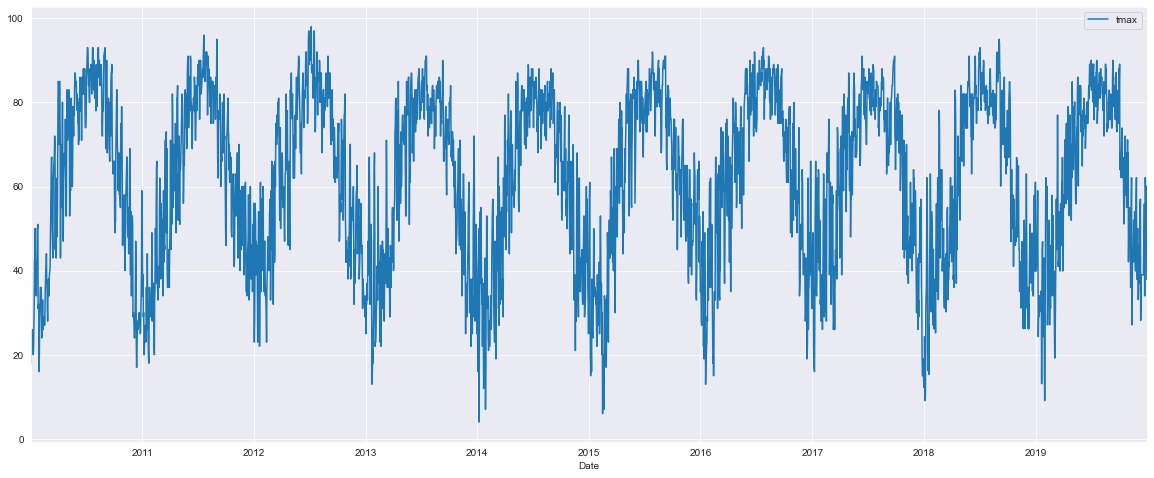

In [5]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(20, 8))
fig, ax = plt.subplots()
ax = pitt_df.plot(ax=ax)

In [6]:
model = AutoReg(pitt_df["tmax"], 30)
model_fit = model.fit()

train_df = pitt_df.iloc[:2920]
test_df = pitt_df.iloc[2920:]

train_model = AutoReg(train_df["tmax"], 730).fit(cov_type="HC0")

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

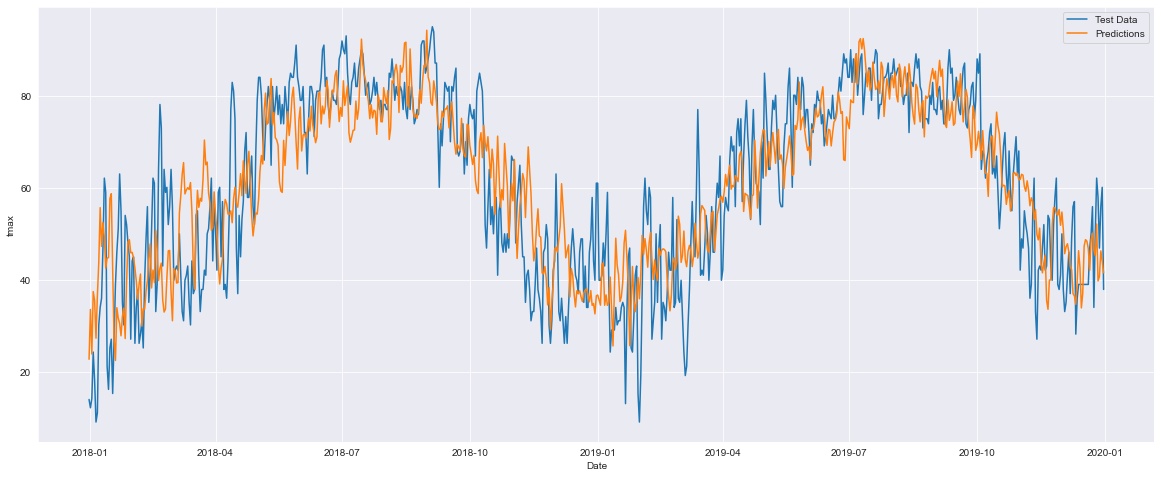

In [7]:
sns.lineplot(x=test_df.index, y=test_df.tmax, label="Test Data")
sns.lineplot(x=test_df.index, y=prediction, label="Predictions")
plt.show()

## Apple Stock Price Data

In [8]:
aapl_df = pd.read_csv("./datasets/AAPL.csv", index_col="Date", parse_dates=True)
aapl_df = aapl_df.asfreq("d")
aapl_df = aapl_df.fillna(method="ffill")

In [9]:
test_df

,tmax
Date,
2017-12-31,14.0
2018-01-01,12.2
2018-01-02,14.2
2018-01-03,24.3
2018-01-04,18.1
...,...
2019-12-27,57.9
2019-12-28,46.9
2019-12-29,55.9


In [10]:
model = AutoReg(aapl_df["Close"], 30)
model_fit = model.fit()

train_df = aapl_df.iloc[:290]
test_df = aapl_df.iloc[290:]

train_model = AutoReg(train_df["Close"], 100).fit(cov_type="HC0")
test_model = AutoReg(test_df["Close"], 32).fit(cov_type="HC0")

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

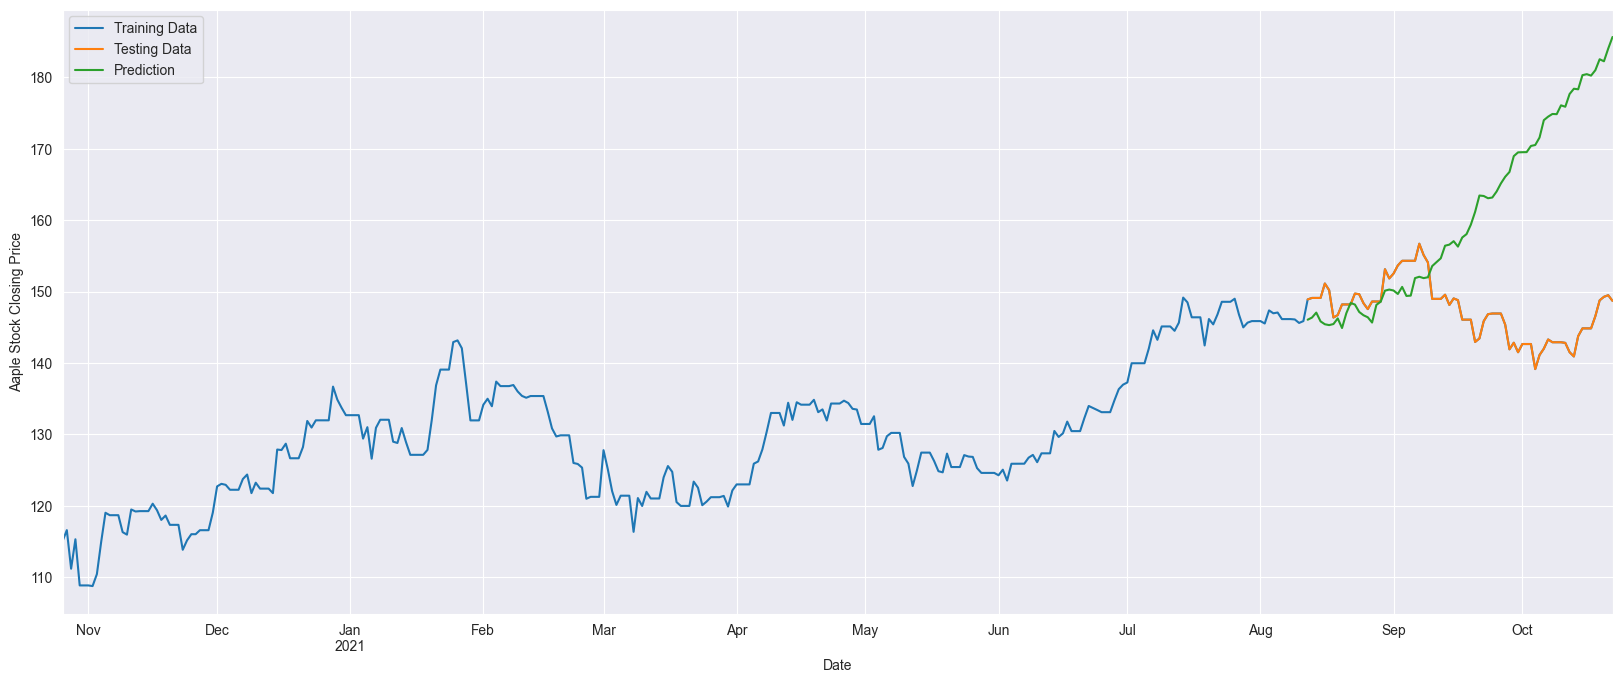

In [11]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(20, 8), dpi=100)
fig, ax = plt.subplots()

ax = aapl_df["Close"].plot(ax=ax) # Training Data
ax = test_df["Close"].plot(ax=ax) # Testing Data
ax = prediction.plot(ax=ax) # Predictions
plt.legend(["Training Data", "Testing Data", "Prediction"])
plt.ylabel("Aaple Stock Closing Price")
plt.show()

Text(0, 0.5, 'Aaple Stock Closing Price')

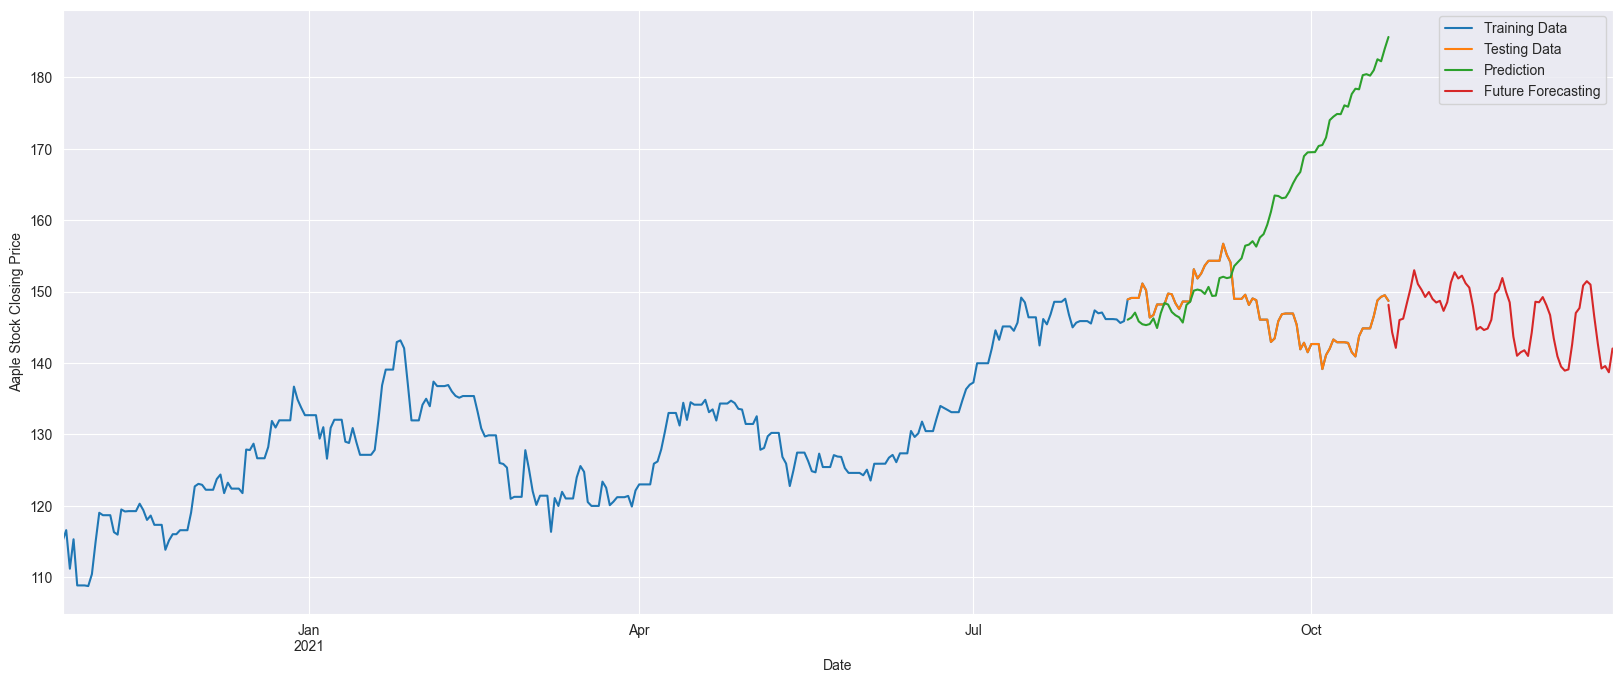

In [12]:
forecast = test_model.predict(start=len(test_df)-1, end=len(test_df)+60, dynamic=True)

aapl_df["Close"].plot() # Training Data
test_df["Close"].plot() # Testing Data
prediction.plot() # Predictions
forecast.plot()
plt.legend(["Training Data", "Testing Data", "Prediction", "Future Forecasting"])
plt.ylabel("Aaple Stock Closing Price")

# ARIMA (Integrated)

## Stationary Datasets

In [29]:
from statsmodels.tsa.stattools import adfuller
#* Augmented Dickey–Fuller test - ADF Test

pitt_df = pd.read_csv("./datasets/PittsburghWeather.csv", index_col="Date", parse_dates=True)

<AxesSubplot:xlabel='Date'>

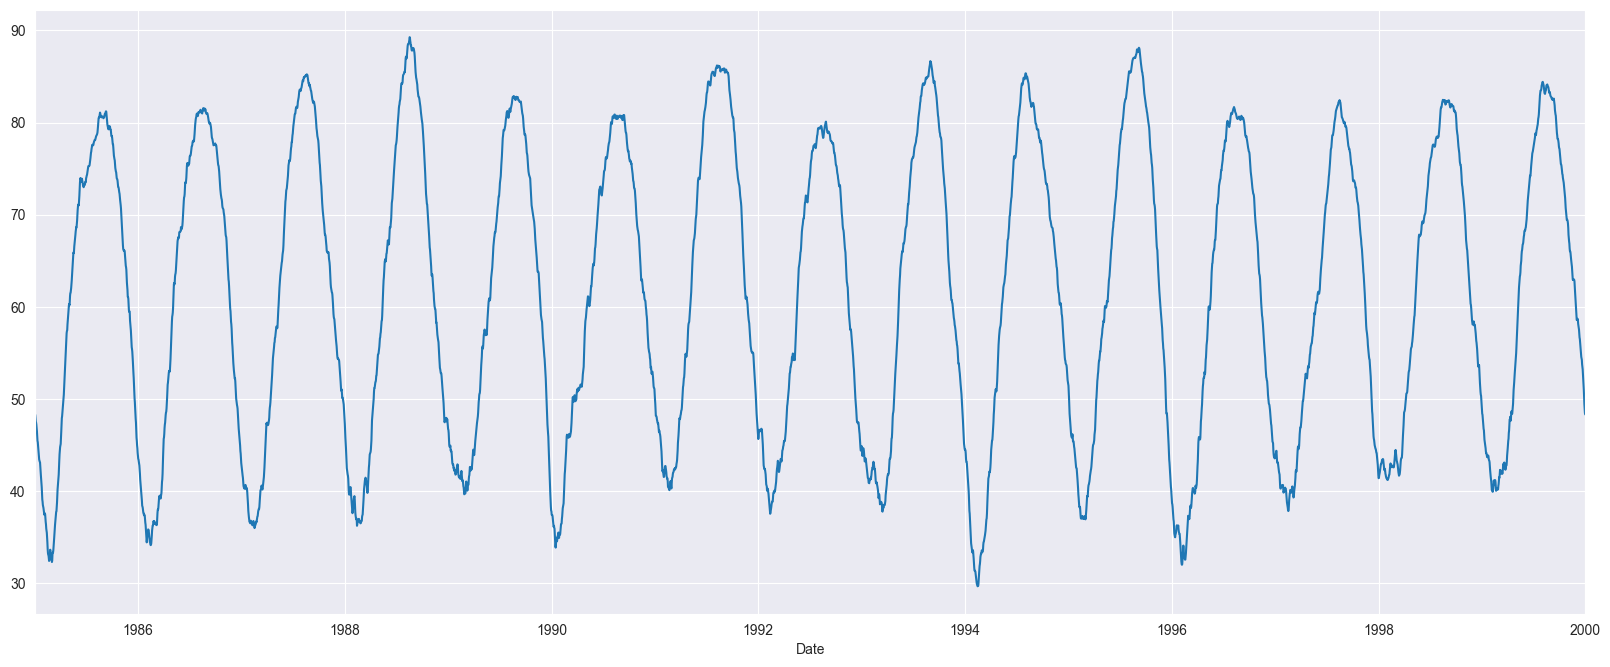

In [18]:
df_2 = pitt_df.rolling(window=60).mean()["tmax"] # Getting Moving Averages
mask = (df_2.index > "1985-01-01") & (df_2.index <= "2000-01-01") # Mask for getting the data between 1985 to 2000
df_2 = df_2.loc[mask] # Applying the Mask
df_2.plot()

<AxesSubplot:xlabel='Year'>

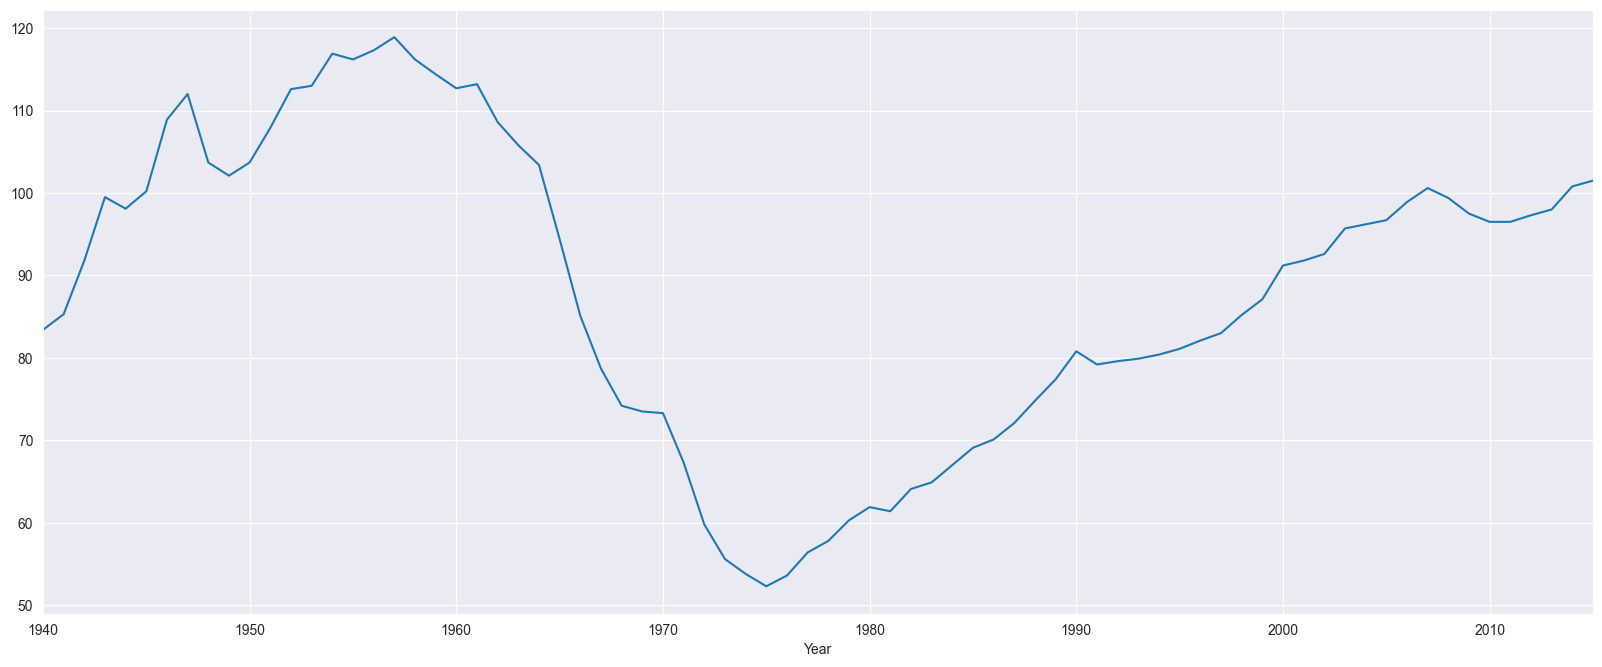

In [27]:
usbr_df = pd.read_csv("./datasets/US-Birth-Rates.csv", index_col="Year", parse_dates=True)
usbr_df["30-34"].plot()

<AxesSubplot:>

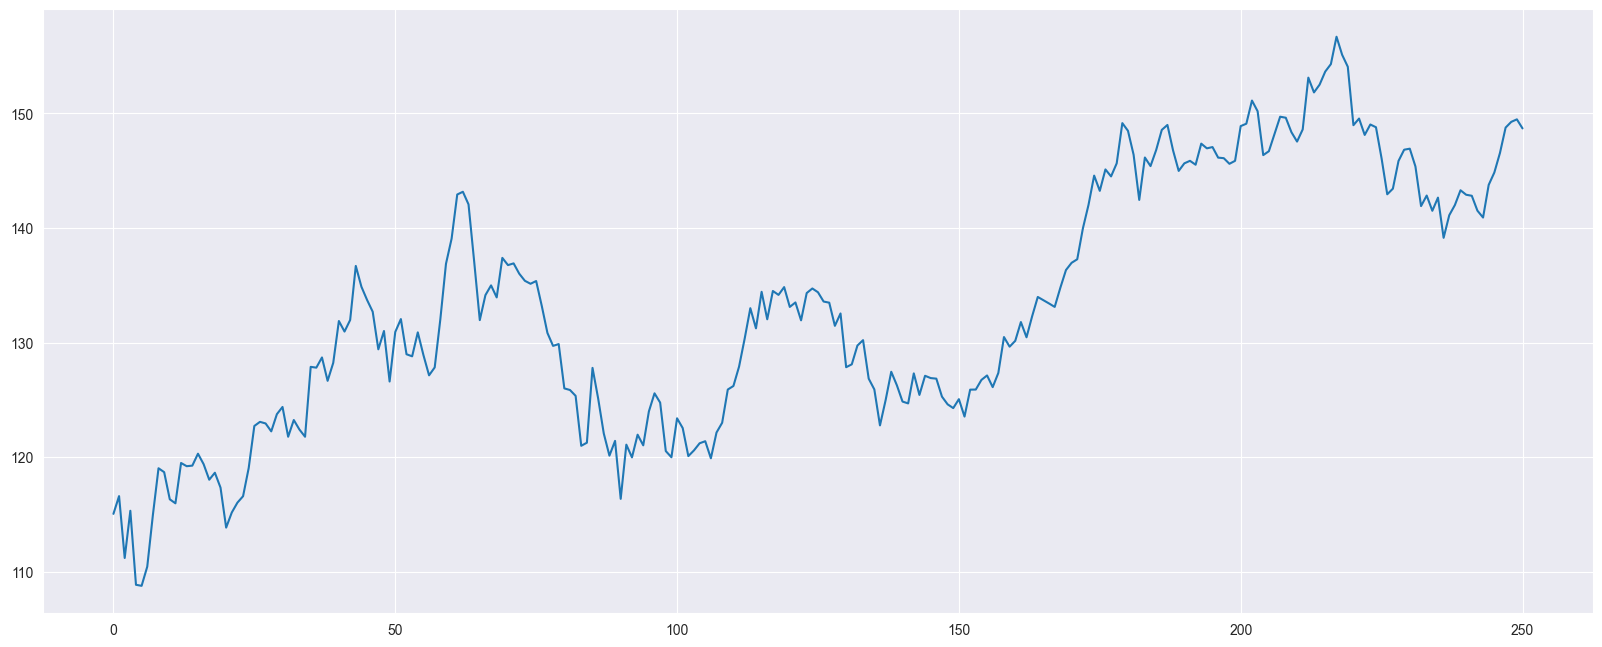

In [28]:
df_aapl = pd.read_csv("./datasets/AAPL.csv")
df_aapl["Close"].plot()

#### Lower p-values -> Stationary/Seasonal Data
#### Higher p-values -> Non-Stationary/Non-Seasonal Data

In [32]:
def adf_test(timeseries):
    print("Dickey-Fuller Test")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Tes Statistic", 'p-value', "#Lags Used", "Number of Observations Used"])
    print(dfoutput)
  
# Pittsburgh Weather Data
adf_test(df_2)

Dickey-Fuller Test
Tes Statistic                 -1.251942e+01
p-value                        2.568080e-23
#Lags Used                     3.300000e+01
Number of Observations Used    5.444000e+03
dtype: float64


In [35]:
# Aaple Stock Closing Price Data
adf_test(aapl_df["Close"])

Dickey-Fuller Test
Tes Statistic                   -1.676082
p-value                          0.443476
#Lags Used                       0.000000
Number of Observations Used    361.000000
dtype: float64
